In [14]:
import matplotlib.pyplot as plt
import numpy as np

from swift_control.eval import simulate_sys

plt.style.use("seaborn-muted")


def render(system, controller, x_0, T, num_steps):
    """Render animation."""
    xs, _, _ = simulate_sys(system, controller, x_0, T, num_steps)
    dt = T / num_steps

    x_solution = np.zeros(len(xs))
    a_solution = xs[:, 0]
    b_solution = xs[:, 2]

    skip_frames = 5

    x_solution = x_solution[::skip_frames]
    a_solution = a_solution[::skip_frames]
    b_solution = b_solution[::skip_frames]

    frames = len(x_solution)

    j1_x = 1 * np.sin(a_solution) + x_solution
    j1_y = 1 * np.cos(a_solution)

    j2_x = 1 * np.sin(b_solution) + j1_x
    j2_y = 1 * np.cos(b_solution) + j1_y

    return j1_x,j1_y, j2_x, j2_y


/tmp/ipykernel_2572818/284130561.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-muted")


In [15]:
import seaborn as sns
def plot_trajectory(or_xs, or_ys, xs, ys, names):
    sns.lineplot(x=or_xs, y=or_ys, label="Oracle", color='black', linestyle="dashdot")
    for x, y, name in zip(xs, ys, names):
        sns.lineplot(x=x, y=y, label=name)
    

In [16]:
from plant_factory import ControllerFactory
from swift_control.util import load_model
from swift_control.init_gpc import init_gpcontroller
swift_path = "/share/dean/fast_control/models/swift_grid/"
plant_conf = swift_path + "base_config.toml"
plant = ControllerFactory(plant_conf)
gps = load_model(swift_path+'gps.pkl')
controllers = [init_gpcontroller(plant, gp) for gp in gps]
x_0 = np.array([2, 0, 0, 0])

In [17]:
xs=[]
ys=[]
j1=[]
j2=[]
qp_j1_x, qp_j1_y, qp_j2_x, qp_j2_y = render(plant.system, plant.qp_controller, x_0, T=10, num_steps=100)
or_j1_x, or_j1_y, or_j2_x, or_j2_y = render(plant.system, plant.oracle_controller, x_0, T=10, num_steps=100)
for controller in controllers:
    j1_x,j1_y, j2_x, j2_y = render(plant.system, controller, x_0, T=10, num_steps=100)
    j1.append(j1_x)
    j2.append(j2_x)
    xs.append(j2_x)
    ys.append(j2_y)
names = ['AD-RF','AD-K','ADP-RF','ADP-K']



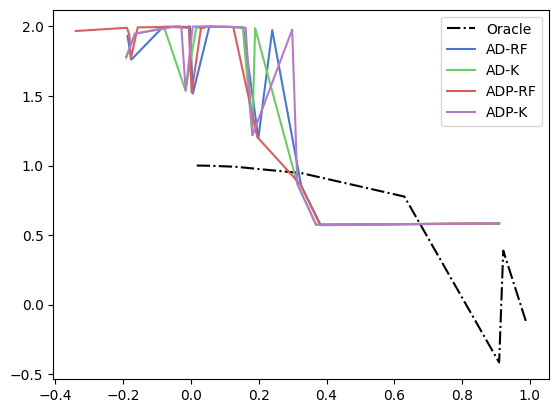

In [20]:
qp_data = qp_j1_x, qp_j1_y, qp_j2_x, qp_j2_y
or_data = or_j1_x, or_j1_y, or_j2_x, or_j2_y
gp_data = xs, ys, j1, j2
np.save(swift_path+'qp_data.npy', qp_data)
np.save(swift_path+'or_data.npy', or_data)
np.save(swift_path+'gp_data.npy', gp_data)
plot_trajectory(or_j1_x, or_j1_y, xs, ys, names)
